In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
data = {
    'x1': [5.1,26.4,23.8,46.4,7.0,12.6,18.9,30.2,53.8,5.6,15.1,20.3,48.4,5.8,11.2,27.9,5.1,11.7,16.7,24.8,24.9,39.5,29.0, 5.5,11.5,5.2,10.6],
    'x2': [400,400,400,400,450,450,450,450,450,400,400,400,400,425,425,425,450,450,450,450,450,450,450,460,450,470,470],
    'x3': [51.37,72.33,71.44,79.15,80.47,89.90,91.48,98.60,98.05,55.69,66.29,58.94,74.74,63.71,67.14,77.65,67.22,81.48,83.88,89.38,79.77,87.93,79.50,72.73,77.88,75.50,83.15],
    'x4': [4.24,30.87,33.01,44.61,33.84,41.26,41.88,70.79,66.82,8.92,17.98,17.79,33.94,11.95,14.73,34.49,14.48,29.69,26.33,37.98,25.66,22.36,31.52,17.86,25.20,8.66,22.39],
    'x5': [1484.83,289.94,320.79,164.76,1097.26,605.06,405.37,253.70,142.27,1362.24,507.65,377.60,158.05,130.66,682.59,274.20,1496.51,652.43, 458.42,312.25,307.08,193.61,155.96,1392.08,663.09,1464.11,720.07],
    'x6': [2227.25,434.90,481.19,247.14,1645.89,907.59,608.05,380.55,213.40,2043.36,761.48,566.40,237.08,1961.49,1023.89,411.30,2244.77,978.64,687.62,468.38,460.62,290.42,233.95,2088.12,994.63,2196.17,1080.11],
    'x7': [2.06,1.33,0.97,0.62,0.22,0.76,1.71,3.93,1.97,5.08,0.60,0.90, 0.63,2.04,1.57,2.38,0.32,0.44,8.82,0.02,1.72,1.88,1.43,1.35,1.61,4.78,5.88],
    'y' : [36.98,13.74,10.08,8.53,36.42,26.59,19.07,5.96,15.52,56.61,26.72,20.80,6.99,45.93,43.09,15.79,21.60,35.19,26.14,8.60,11.63,9.59,4.42,38.89,11.19,75.62,36.03],
}

data = pd.DataFrame(data)
data.describe()

,x1,x2,x3,x4,x5,x6,x7,y
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,20.111111,434.259259,76.865556,28.490741,595.280741,958.310741,2.037778,24.730370
std,14.176072,24.872896,11.920700,15.861779,467.314655,715.652290,2.021265,17.398179
min,5.100000,400.000000,51.370000,4.240000,130.660000,213.400000,0.020000,4.420000
25%,8.800000,400.000000,69.330000,17.825000,263.950000,423.100000,0.695000,10.635000
50%,16.700000,450.000000,77.880000,26.330000,405.370000,687.620000,1.570000,20.800000
75%,27.150000,450.000000,83.515000,34.215000,701.330000,1363.000000,2.050000,36.225000
max,53.800000,470.000000,98.600000,70.790000,1496.510000,2244.770000,8.820000,75.620000


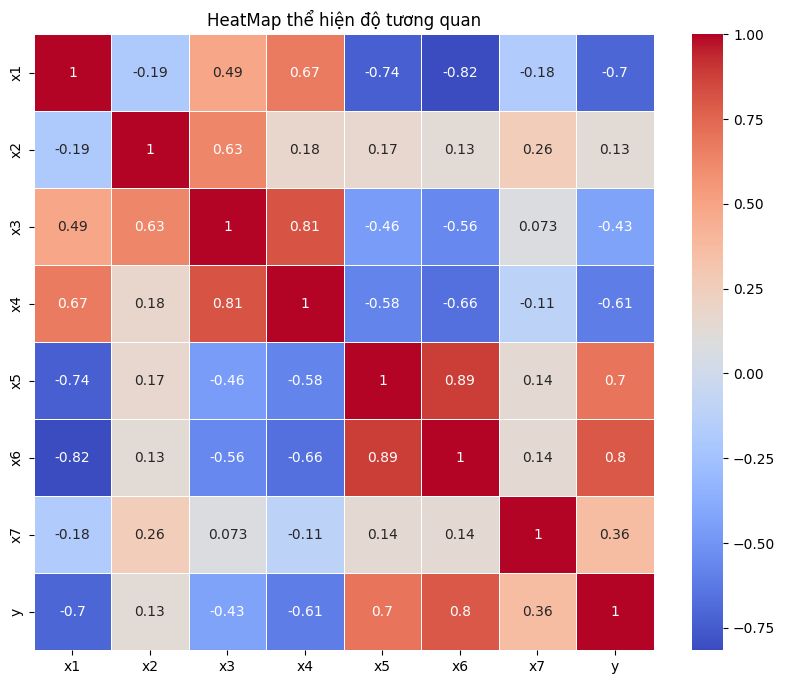

In [5]:
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('HeatMap thể hiện độ tương quan')
plt.show()

Từ biểu đồ, xác định x6 có tương quan lớn nhất với y => Xây dựng mô hình hồi quy với đầu vào là x6

In [11]:
X = data[['x6']]
y = data['y']
# print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients: ", model.coef_)
print("Intercept: ", round(model.intercept_,4))
print("y =", round(model.intercept_,4), "+", round(model.coef_[0],4), "× x6")

print("mean_squared_error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Coefficients:  [0.01937387]
Intercept:  4.7613
y = 4.7613 + 0.0194 × x6
mean_squared_error:  8.253072007042386
